# Algorithms 4, 5, & 6

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad

### Algorithm 4 - Feature Extraction

In [62]:
# The dataframe may be different columns so adjust as needed based on other algorithms
# TODO: Change the dataframe to separate high and low peaks to make this method easier?

def feature_engineering(data):
    high_peaks = data["CH1"]
    low_peaks = data["Rand"]
    stimulus_onset = data[2] 
    activation_onset = data[3]
    peak_times = data[4]
    # TODO: find a way to iterate through all peak values (maybe pass them in as a list)
    all_values = data[5]

    # Calculate Peak to Peak amplitude
    # TODO: This might still need to be normalized
    distance = np.subtract(high_peaks, low_peaks)
    p2pa = np.abs(distance)

    # Activation Latency
    # # TODO: Do I find the #1 highest and lowest peak or do I have to repeat this step
    stim_time = np.subtract(activation_onset - stimulus_onset)
    peak_time_diff = np.max(peak_times) - np.min(peak_times)

    # Integrated EMG Value
    rectified_emg = np.abs(all_values)
    x = np.linspace(0, 24399, 1)

    # Was there evoked potential?
        

    return p2pa, stim_time, peak_time_diff


In [63]:
data = pd.read_excel('../Data/multichannel_emg_signals.xlsx')
rand = np.random.randint(0, 10, size=24399)
random_nums = pd.DataFrame(rand, columns=['Rand'])
df = pd.concat([data, random_nums], axis=1)
df.head()

,CH1,CH2,CH3,CH4,CH5,Rand
0,-0.000264,-0.000264,-0.000264,-0.000264,-0.000264,2
1,-0.000256,-0.000256,-0.000256,-0.000256,-0.000256,4
2,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,0
3,-0.000264,-0.000264,-0.000264,-0.000264,-0.000264,2
4,-0.000247,-0.000247,-0.000247,-0.000247,-0.000247,0


In [64]:
p2pa = feature_engineering(df)
print(p2pa)

0        2.000264
1        4.000256
2        0.000254
3        2.000264
4        0.000247
           ...   
24394    3.000193
24395    7.000193
24396    5.000188
24397    9.000177
24398    0.000174
Length: 24399, dtype: float64


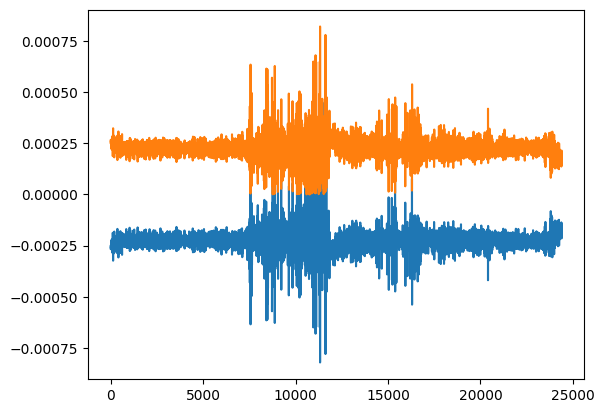

In [72]:
x = np.linspace(0, 24399, 24399)
y = df['CH1'].to_numpy()

rectified_emg = np.abs(y)


plt.plot(x, y)
plt.plot(x, rectified_emg)

In [73]:
area_trapz = np.trapz(y, x)

C:\Users\andrewss\AppData\Local\Temp\ipykernel_40280\3030596718.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_trapz = np.trapz(y, x)
